# Taii Hirano

## **What is the best company size in North America for each experience level based on their salary?**

Sub Questions:

- What is the salary level of Large company size whose experience level is Middle?
- What is the salary level of Middle company size whose experience level is Senior?
- What is the salary level of Middle company size in North America whose experience level is Senior?

Recent popularity in the data science/computer science field suggests the need for data analysis jobs. However, when we graduate from post-secondary education, we face the difficulties of choosing jobs. One of the reasons this problem occurs is that students do not have enough resources to determine their future careers. This problem could be solved by analyzing how the size of the company relates to the salary level. More in detail, we can analyze the relevance between regions and company size and the tendency of hired workers’ experience levels in a specified scale of the company. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', FutureWarning)

sns.set_theme(style="whitegrid",
              font_scale=1.3, # This scales the fonts slightly higher
              )
# And we're going to remove the top and right axis lines
plt.rc("axes.spines", top=False, right=False)

In [2]:
# load file
df = pd.read_csv("../data/raw/ds_salaries.csv", header=1)
df = df.drop(columns="Unnamed: 0")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


## Milestone 3

### 1. Summary of the dataset
First we explore the dataset using the `describe()` function.

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


In [4]:
df.describe(exclude='number').T

,count,unique,top,freq
experience_level,607,4,SE,280
employment_type,607,4,FT,588
job_title,607,50,Data Scientist,143
salary_currency,607,17,USD,398
employee_residence,607,57,US,332
company_location,607,50,US,355
company_size,607,3,M,326


### 2. Drop some columns that is not necessary for the research questions
For this tasks, I will drop the `work_year`, `employment_type`, `job_title`, `salary`, `salary_currency`, and `remote_ratio` and name it `df1`.

In [5]:
# drop the unrelated columns
df1 = df.drop(columns=["work_year", "employment_type", "job_title", "salary", "salary_currency", "remote_ratio"])
df1

,experience_level,salary_in_usd,employee_residence,company_location,company_size
0,MI,79833,DE,DE,L
1,SE,260000,JP,JP,S
2,SE,109024,GB,GB,M
3,MI,20000,HN,HN,S
4,SE,150000,US,US,L
...,...,...,...,...,...
602,SE,154000,US,US,M
603,SE,126000,US,US,M
604,SE,129000,US,US,M
605,SE,150000,US,US,M


### 3. Plot the count of each experience level based on the company size.
#### 3.1 Create the dataframes that only contains each company size

In [6]:
# dataframe of Large size company
dfL = df1[df["company_size"] == "L"]
dfL

,experience_level,salary_in_usd,employee_residence,company_location,company_size
0,MI,79833,DE,DE,L
4,SE,150000,US,US,L
5,EN,72000,US,US,L
7,MI,35735,HU,HU,L
8,MI,135000,US,US,L
...,...,...,...,...,...
524,MI,135000,US,US,L
525,SE,177000,US,US,L
550,SE,205300,US,US,L
551,SE,140400,US,US,L


In [7]:
# dataframe of Medium size company
dfM = df1[df["company_size"] == "M"]
dfM

,experience_level,salary_in_usd,employee_residence,company_location,company_size
2,SE,109024,GB,GB,M
12,EN,39916,FR,FR,M
18,EN,5707,IN,IN,M
19,MI,56000,PT,US,M
20,MI,43331,CN,CN,M
...,...,...,...,...,...
601,EN,52000,CA,CA,M
602,SE,154000,US,US,M
603,SE,126000,US,US,M
604,SE,129000,US,US,M


In [8]:
# dataframe of Small size company
dfS = df1[df["company_size"] == "S"]
dfS

,experience_level,salary_in_usd,employee_residence,company_location,company_size
1,SE,260000,JP,JP,S
3,MI,20000,HN,HN,S
6,SE,190000,US,US,S
9,SE,125000,NZ,NZ,S
10,EN,51321,FR,FR,S
...,...,...,...,...,...
510,EN,150000,AU,AU,S
512,EN,65000,US,US,S
513,SE,71444,IE,IE,S
515,MI,48000,RU,US,S


#### 3.2 Select the information needed for plotting

In [9]:
# select the experience level and company size, and group by experience level to count the number of each levels for 3 sizes.
dfL = dfL.loc[:, ["experience_level", "company_size"]].groupby("experience_level").count().reset_index().rename(columns={"company_size":"count"}).assign(company_size="Large")
dfM = dfM.loc[:, ["experience_level", "company_size"]].groupby("experience_level").count().reset_index().rename(columns={"company_size":"count"}).assign(company_size="Medium")
dfS = dfS.loc[:, ["experience_level", "company_size"]].groupby("experience_level").count().reset_index().rename(columns={"company_size":"count"}).assign(company_size="Small")

In [10]:
dfL

,experience_level,count,company_size
0,EN,29,Large
1,EX,11,Large
2,MI,86,Large
3,SE,72,Large


In [11]:
dfM

,experience_level,count,company_size
0,EN,30,Medium
1,EX,12,Medium
2,MI,98,Medium
3,SE,186,Medium


In [12]:
dfS

,experience_level,count,company_size
0,EN,29,Small
1,EX,3,Small
2,MI,29,Small
3,SE,22,Small


In [13]:
# summary of counts of experience level based on the company size
dfCompanySize = pd.concat([dfL, dfM, dfS])
dfCompanySize

,experience_level,count,company_size
0,EN,29,Large
1,EX,11,Large
2,MI,86,Large
3,SE,72,Large
0,EN,30,Medium
1,EX,12,Medium
2,MI,98,Medium
3,SE,186,Medium
0,EN,29,Small
1,EX,3,Small


#### Plot of the Experience Level by Company Size

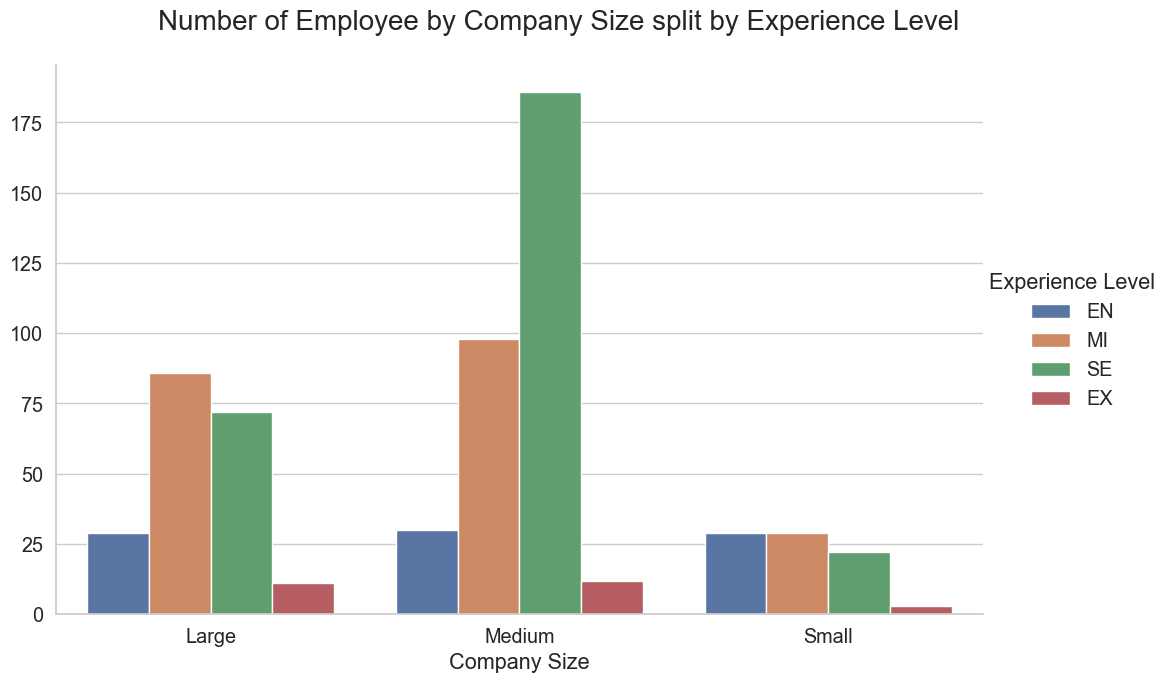

In [14]:
axCountSummary = sns.catplot(data = dfCompanySize, kind = "bar",
                             x = "company_size", y = "count", hue = "experience_level",
                             hue_order = ["EN", "MI", "SE", "EX"], height = 7, aspect = 1.5
                             )
axCountSummary.fig.subplots_adjust(top=.9)
axCountSummary.fig.suptitle("Number of Employee by Company Size split by Experience Level", size = 20)
axCountSummary.legend.set_title("Experience Level")
plt.xlabel("Company Size")
plt.ylabel("")
plt.show()

As shown above, number of the Medium size company is largest among three company size. Large size companies have more Middle-level experience workers, Middle size companies have more Senior-level experience workers and Small size companies have almost the same number of Entry and Middle-level experience workers.

### 4. Summary of Findings
#### 4.1 Number of Experience Level based on company size L

- The Mid-level experience workers are hired at most company with Size L.

Although the number of workers with Mid-level experience is the most common in the company size L, population of the workers with Senior-level experience is quite large too. I assume this is because Large companies need many workers with Mid-level and Senior-level experience in order to work on bigger projects with less workers with Expert-level experience. In other words, it is centralized system.

**Notes: Need more further research.**

#### 4.2 Number of Experience Level based on company size M

- The Senior-level experience workers are hired at most company with Size M.

The number of workers with Senior-level experiene is the most among four other experience levels in the company size M. I predict this is because the Medium companies has a limitation in hiring people while working on somewhat bigger project. Thus, they need workers with Senior-level experience who can work independently.

#### 4.3 Number of Experience Level based on company size S

- The Entry-level and the Mid-level experience workers (almost the same) are hired at most company with Size S.

The number of workers with Entry-level and the workers with Mid-level are the highest in the company size S and it is almost the same. I analyze this is becasue Small companies do not need many workers with Senior or Expert-level experience as it is limiting to smaller project.

### 5. Next Analysis Plan

Through this EDA, I found out the most common experience level in each company size.

For the next Milestone Project, I will work on these research question:

- **Which region tends to have a Large-level Company size?**
- **Which region tends to have a Middle-level company size?**
- **Which region tends to have a Small-level company size?**

For the next Milestone Project, I would like to know the relationship between company size based on the region and find out which regioin tends to have Large-level, Middle-level, Small-level conpany size.

## Milestone 4

From the Milestone 3, I found out that there are more Middle size companies than the other two compnay sizes and common experience level in each company size. I slightly changed the research question, so I will add some new Analysis pipeline.

### 1. Analysis Pipeline

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid",
              font_scale=1.3, # This scales the fonts slightly higher
              )
# And we're going to remove the top and right axis lines
plt.rc("axes.spines", top=False, right=False)

### 1.1 Load data

In [16]:
df = pd.read_csv("../data/processed/ds_salaries_1.csv")

### 1.2 Clean data

In [17]:
df1 = df.drop(columns=["work_year", "employment_type", "job_title", "salary", "salary_currency", "remote_ratio"])
df1

,experience_level,salary_in_usd,employee_residence,company_location,company_size,company_region
0,MI,79833,DE,DE,L,Europe
1,SE,260000,JP,JP,S,Asia
2,SE,109024,GB,GB,M,Europe
3,MI,20000,HN,HN,S,Latin America
4,SE,150000,US,US,L,North America
...,...,...,...,...,...,...
602,SE,154000,US,US,M,North America
603,SE,126000,US,US,M,North America
604,SE,129000,US,US,M,North America
605,SE,150000,US,US,M,North America


In [18]:
# check the unique elements in the company region
df["company_region"].unique()

array(['Europe', 'Asia', 'Latin America', 'North America', 'Oceania',
       'Middle East', 'Africa'], dtype=object)

### 1.3 process data

For the new research question, I would like to see the distribution of each company size in different region. I will create dataframes for each region.

In [19]:
# create a dataframe for each company region
dfEurope = df1[df1["company_region"] == "Europe"]
dfAsia = df1[df1["company_region"] == "Asia"]
dfLatAm = df1[df1["company_region"] == "Latin America"]
dfNorAm = df1[df1["company_region"] == "North America"]
dfOceania = df1[df1["company_region"] == "Oceania"]
dfMidEast = df1[df1["company_region"] == "Middle East"]
dfAfrica = df1[df1["company_region"] == "Africa"]

### 1.4 wrangle data

I will wrangle the dataframes to see the count of each company size in specific region.

In [20]:
# dataframes of count by company size for each region
dfEurope = dfEurope.loc[:, ["company_size", "company_region"]].groupby("company_size").count().reset_index().rename(columns={"company_region":"count"}).assign(company_region="Europe").assign(percentage=lambda x: (x["count"] / sum(x["count"]) * 100))
dfAsia = dfAsia.loc[:, ["company_size", "company_region"]].groupby("company_size").count().reset_index().rename(columns={"company_region":"count"}).assign(company_region="Asia").assign(percentage=lambda x: (x["count"] / sum(x["count"]) * 100))
dfLatAm = dfLatAm.loc[:, ["company_size", "company_region"]].groupby("company_size").count().reset_index().rename(columns={"company_region":"count"}).assign(company_region="Latin America").assign(percentage=lambda x: (x["count"] / sum(x["count"]) * 100))
dfNorAm = dfNorAm.loc[:, ["company_size", "company_region"]].groupby("company_size").count().reset_index().rename(columns={"company_region":"count"}).assign(company_region="North America").assign(percentage=lambda x: (x["count"] / sum(x["count"]) * 100))
dfOceania = dfOceania.loc[:, ["company_size", "company_region"]].groupby("company_size").count().reset_index().rename(columns={"company_region":"count"}).assign(company_region="Oceania").assign(percentage=lambda x: (x["count"] / sum(x["count"]) * 100))
dfMidEast = dfMidEast.loc[:, ["company_size", "company_region"]].groupby("company_size").count().reset_index().rename(columns={"company_region":"count"}).assign(company_region="Middle East").assign(percentage=lambda x: (x["count"] / sum(x["count"]) * 100))
dfAfrica = dfAfrica.loc[:, ["company_size", "company_region"]].groupby("company_size").count().reset_index().rename(columns={"company_region":"count"}).assign(company_region="Africa").assign(percentage=lambda x: (x["count"] / sum(x["count"]) * 100))

In [21]:
# concatinate all the dataframes by region into one to make it easier to see
dfSummary = pd.concat([dfNorAm, dfEurope, dfAsia, dfLatAm, dfOceania, dfMidEast, dfAfrica])
dfSummary

,company_size,count,company_region,percentage
0,L,117,North America,30.389610
1,M,234,North America,60.779221
2,S,34,North America,8.831169
0,L,58,Europe,36.942675
1,M,72,Europe,45.859873
2,S,27,Europe,17.197452
0,L,17,Asia,44.736842
1,M,11,Asia,28.947368
2,S,10,Asia,26.315789
0,L,2,Latin America,22.222222


### 2.1 Method Chaining and Funcrions

In [22]:
from codes import project_functions1 as pf1

I will do the same tasks in Task 1 using method chaining.

In [23]:
# dfEurope = (
#   pd.read_csv("../data/processed/ds_salaries_1.csv")
#   .drop(columns=["work_year", "employment_type", "job_title", "salary", "salary_currency", "remote_ratio"])
#   .loc[lambda df: df["company_region"] == "Europe"]
#   .loc[:, ["company_size", "company_region"]]
#   .groupby("company_size")
#   .count()
#   .reset_index()
#   .rename(columns={"company_region":"count"})
#   .assign(company_region="Europe")
#   .assign(percentage=lambda x: (x["count"] / sum(x["count"]) * 100))
# )
# dfEurope

dfEurope = pf1.load_process_region("../data/processed/ds_salaries_1.csv", "Europe")
dfEurope

,company_size,count,company_region,percentage
0,L,58,Europe,36.942675
1,M,72,Europe,45.859873
2,S,27,Europe,17.197452


In [24]:
# dfAsia = (
#   pd.read_csv("../data/processed/ds_salaries_1.csv")
#   .drop(columns=["work_year", "employment_type", "job_title", "salary", "salary_currency", "remote_ratio"])
#   .loc[lambda df: df["company_region"] == "Asia"]
#   .loc[:, ["company_size", "company_region"]]
#   .groupby("company_size")
#   .count()
#   .reset_index()
#   .rename(columns={"company_region":"count"})
#   .assign(company_region="Asia")
#   .assign(percentage=lambda x: (x["count"] / sum(x["count"]) * 100))
# )

dfAsia = pf1.load_process_region("../data/processed/ds_salaries_1.csv", "Asia")
dfAsia

,company_size,count,company_region,percentage
0,L,17,Asia,44.736842
1,M,11,Asia,28.947368
2,S,10,Asia,26.315789


In [25]:
# dfLatAm = (
#   pd.read_csv("../data/processed/ds_salaries_1.csv")
#   .drop(columns=["work_year", "employment_type", "job_title", "salary", "salary_currency", "remote_ratio"])
#   .loc[lambda df: df["company_region"] == "Latin America"]
#   .loc[:, ["company_size", "company_region"]]
#   .groupby("company_size")
#   .count()
#   .reset_index()
#   .rename(columns={"company_region":"count"})
#   .assign(company_region="Latin America")
#   .assign(percentage=lambda x: (x["count"] / sum(x["count"]) * 100))
# )

dfLatAm = pf1.load_process_region("../data/processed/ds_salaries_1.csv", "Latin America")
dfLatAm

,company_size,count,company_region,percentage
0,L,2,Latin America,22.222222
1,M,3,Latin America,33.333333
2,S,4,Latin America,44.444444


In [26]:
# dfNorAm = (
#   pd.read_csv("../data/processed/ds_salaries_1.csv")
#   .drop(columns=["work_year", "employment_type", "job_title", "salary", "salary_currency", "remote_ratio"])
#   .loc[lambda df: df["company_region"] == "North America"]
#   .loc[:, ["company_size", "company_region"]]
#   .groupby("company_size")
#   .count()
#   .reset_index()
#   .rename(columns={"company_region":"count"})
#   .assign(company_region="North America")
#   .assign(percentage=lambda x: (x["count"] / sum(x["count"]) * 100))
# )

dfNorAm = pf1.load_process_region("../data/processed/ds_salaries_1.csv", "North America")
dfNorAm

,company_size,count,company_region,percentage
0,L,117,North America,30.389610
1,M,234,North America,60.779221
2,S,34,North America,8.831169


In [27]:
# dfOceania = (
#   pd.read_csv("../data/processed/ds_salaries_1.csv")
#   .drop(columns=["work_year", "employment_type", "job_title", "salary", "salary_currency", "remote_ratio"])
#   .loc[lambda df: df["company_region"] == "Oceania"]
#   .loc[:, ["company_size", "company_region"]]
#   .groupby("company_size")
#   .count()
#   .reset_index()
#   .rename(columns={"company_region":"count"})
#   .assign(company_region="Oceania")
#   .assign(percentage=lambda x: (x["count"] / sum(x["count"]) * 100))
# )

dfOceania = pf1.load_process_region("../data/processed/ds_salaries_1.csv", "Oceania")
dfOceania

,company_size,count,company_region,percentage
0,L,1,Oceania,20.0
1,M,1,Oceania,20.0
2,S,3,Oceania,60.0


In [28]:
# dfMidEast = (
#   pd.read_csv("../data/processed/ds_salaries_1.csv")
#   .drop(columns=["work_year", "employment_type", "job_title", "salary", "salary_currency", "remote_ratio"])
#   .loc[lambda df: df["company_region"] == "Middle East"]
#   .loc[:, ["company_size", "company_region"]]
#   .groupby("company_size")
#   .count()
#   .reset_index()
#   .rename(columns={"company_region":"count"})
#   .assign(company_region="Middle East")
#   .assign(percentage=lambda x: (x["count"] / sum(x["count"]) * 100))
# )

dfMidEast = pf1.load_process_region("../data/processed/ds_salaries_1.csv", "Middle East")
dfMidEast

,company_size,count,company_region,percentage
0,L,2,Middle East,22.222222
1,M,4,Middle East,44.444444
2,S,3,Middle East,33.333333


In [29]:
# dfAfrica = (
#   pd.read_csv('../data/processed/ds_salaries_1.csv')
#   .drop(columns=["work_year", "employment_type", "job_title", "salary", "salary_currency", "remote_ratio"])
#   .loc[lambda df: df["company_region"] == "Africa"]
#   .loc[:, ["company_size", "company_region"]]
#   .groupby("company_size")
#   .count()
#   .reset_index()
#   .rename(columns={"company_region":"count"})
#   .assign(company_region="Africa")
#   .assign(percentage=lambda x: (x["count"] / sum(x["count"]) * 100))
# )

dfAfrica = pf1.load_process_region("../data/processed/ds_salaries_1.csv", "Africa")
dfAfrica

,company_size,count,company_region,percentage
0,L,1,Africa,25.0
1,M,1,Africa,25.0
2,S,2,Africa,50.0


#### Summary of Count and Percentage by Company Size

In [30]:
dfSummary = pd.concat([dfNorAm, dfEurope, dfAsia, dfLatAm, dfMidEast, dfOceania, dfAfrica])
dfSummary

,company_size,count,company_region,percentage
0,L,117,North America,30.389610
1,M,234,North America,60.779221
2,S,34,North America,8.831169
0,L,58,Europe,36.942675
1,M,72,Europe,45.859873
2,S,27,Europe,17.197452
0,L,17,Asia,44.736842
1,M,11,Asia,28.947368
2,S,10,Asia,26.315789
0,L,2,Latin America,22.222222


### 2.2 Wrap Up Method Chaining in a Function

In [31]:
# def load_process_region(path, regionName):
#   """
#   Load the data from the given path and process the data based on the given region. After processing, it returns the dataframe of the count by each company size.
#   Args:
#       path (string): the path of the file to load the file.
#       regionName (string): the name of the region to be proecessed.

#   Returns:
#       pandas.core.frame.DataFrame: the processed dataframe that includes the count by company size based on the region.
#   """
#   dfRegion = (
#       pd.read_csv(path)
#       .drop(columns=["work_year", "employment_type", "job_title", "salary", "salary_currency", "remote_ratio"])
#       .loc[lambda df: df["company_region"] == regionName]
#       .loc[:, ["company_size", "company_region"]]
#       .groupby("company_size")
#       .count()
#       .reset_index()
#       .rename(columns={"company_region":"count"})
#       .assign(company_region = regionName)
#       .assign(percentage=lambda x: (x["count"] / sum(x["count"]) * 100))
#   )
#   return dfRegion

In [32]:
# testing function load_process_region
# dfEurope = load_process_region("../data/processed/ds_salaries_1.csv", "Europe")
# dfEurope

### 3. Conduct Analysis

### 3.1 Visualization

#### RQ 1: How are the each company size distributed over the region?

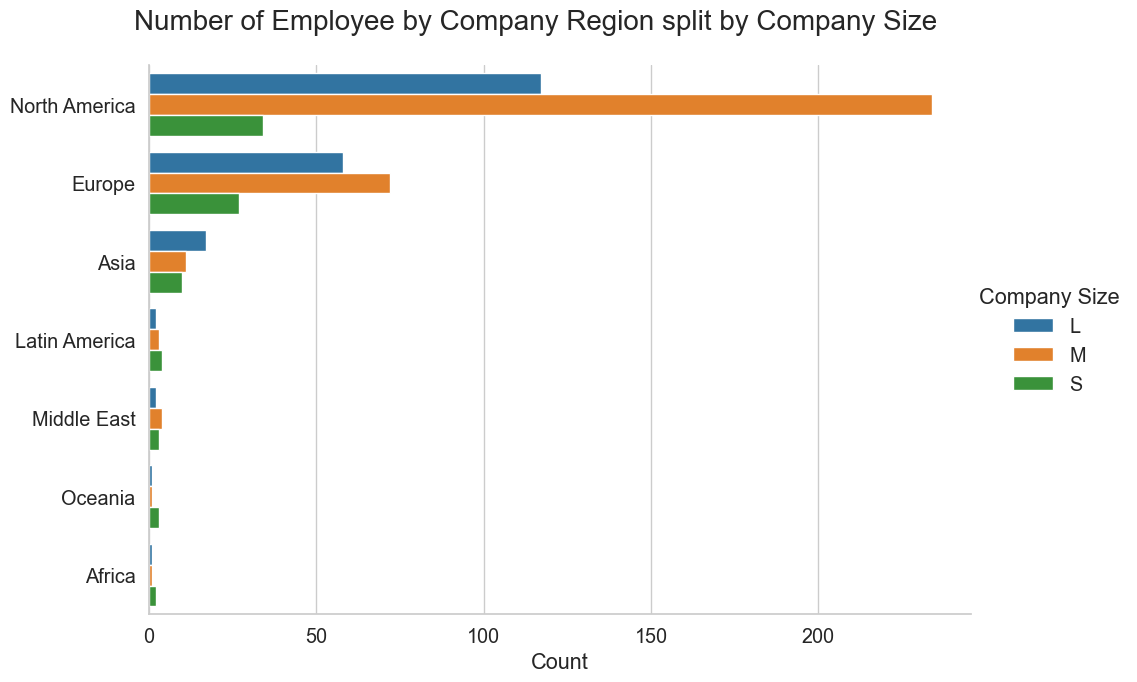

In [33]:
axCountSummary = sns.catplot(data = dfSummary, kind = "bar",
                             x = "count", y = "company_region", hue = "company_size",
                             height = 7, aspect = 1.5, palette = "tab10"
                             )
axCountSummary.fig.subplots_adjust(top=.9)
axCountSummary.fig.suptitle("Number of Employee by Company Region split by Company Size", size = 20)
axCountSummary.legend.set_title("Company Size")
plt.xlabel("Count")
plt.ylabel("")
plt.show()

The above catplot shows that most of the data are collected from companies in North America.  In the North America region, companies with Medium size are almost twice more than the companies with Large size. On the other hand in Asia region, there are more companies with Large size than Medium size.

#### RQ 2: For each region, which level of company size do they tends to have?

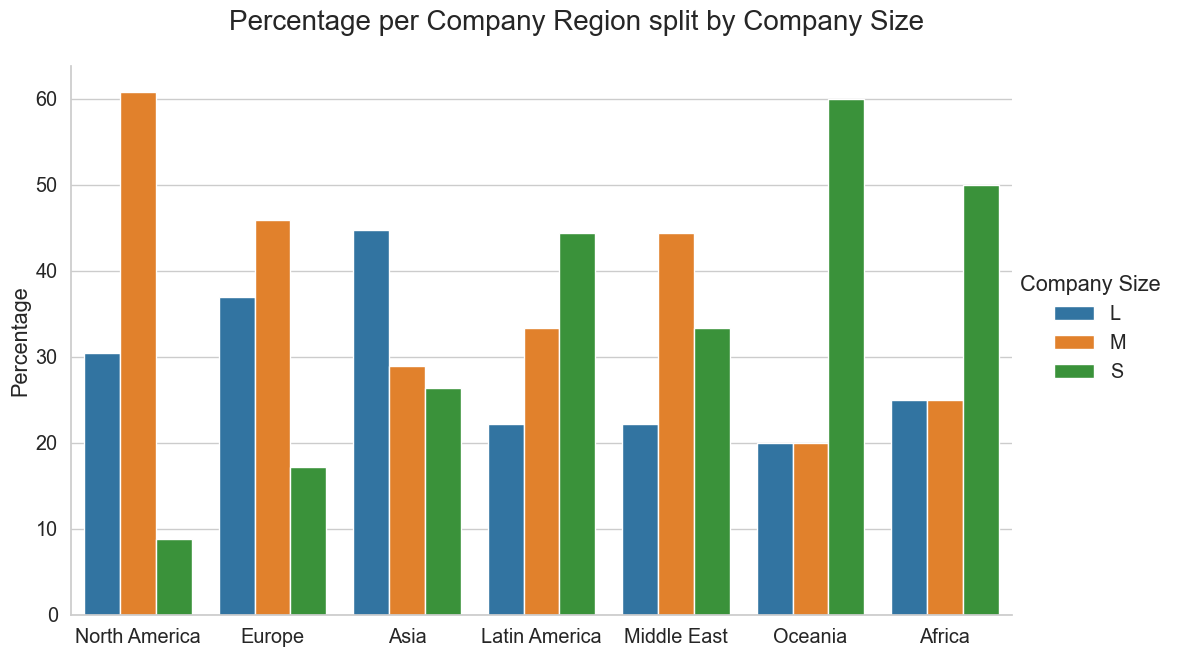

In [34]:
axPercentSummary = sns.catplot(data = dfSummary, kind = "bar",
                               x = "company_region", y = "percentage", hue = "company_size",
                               height = 7, aspect = 1.5, palette = "tab10"
                               )
axPercentSummary.fig.subplots_adjust(top=.9)
axPercentSummary.fig.suptitle("Percentage per Company Region split by Company Size", size = 20)
axPercentSummary.legend.set_title("Company Size")
plt.xlabel("")
plt.ylabel("Percentage")
plt.show()

The above plot shows that in North America and Europe, there are more Medium size companies compared to other sizes. On the other hand, Asia has more Large size companies. For Latin America, Oceania, and Africa, there are more Small size companies. However, considering the number of sample from these region, it is not reliable to say that they tends to have Small size companies.

### 3.2 Summary of Findings

#### RQ1. How are the each company size distributed over the region? (Plot 1)

- North America has the largest number of data, in which Medium size companies are the most common size of company.
- Europe has the second largest number of data and Middle size companies are most common.
- Asia tends to have Large size companies.

#### RQ2. For each region, which level of company size do they tends to have? (Plot 2)

- North America tends to have Middle-level company size based on both the percentage and the count (Plot 1 & Plot 2).
- Oceania tends to have Small-level company size. However, the number of samples from Oceania is small, thus it is not reliable conclusion.
- Excluding the Oceania and the Africa, in which the number of sample is too small, Latin America tends to have Small-level company size.

### 3.3 Revise the Research Questions

Through Milestone 4, I found out the most common company size in each region.

For the next Milestone Project, I will dig deeper into their salaries in the most common experience level, company size and the region:

- **What is the salary level of Large company size whose experience level is Middle?**
- **What is the salary level of Middle company size whose experience level is Senior?**
- **What is the salary level of Middle company size in North America whose experience level is Middle?**
- **What is the salary level of Middle company size in North America whose experience level is Senior?**

Based on the data I analyzed through the EDA and visualizations, I would like to know the salary level of Middle and Large company whose experience level is Middle or Senior for the next Milestone Project.

#### RQ: What is the difference in salary level by experience level for each company sizes in North America?

In [35]:
dfNorAm = df1[df1["company_region"] == "North America"]

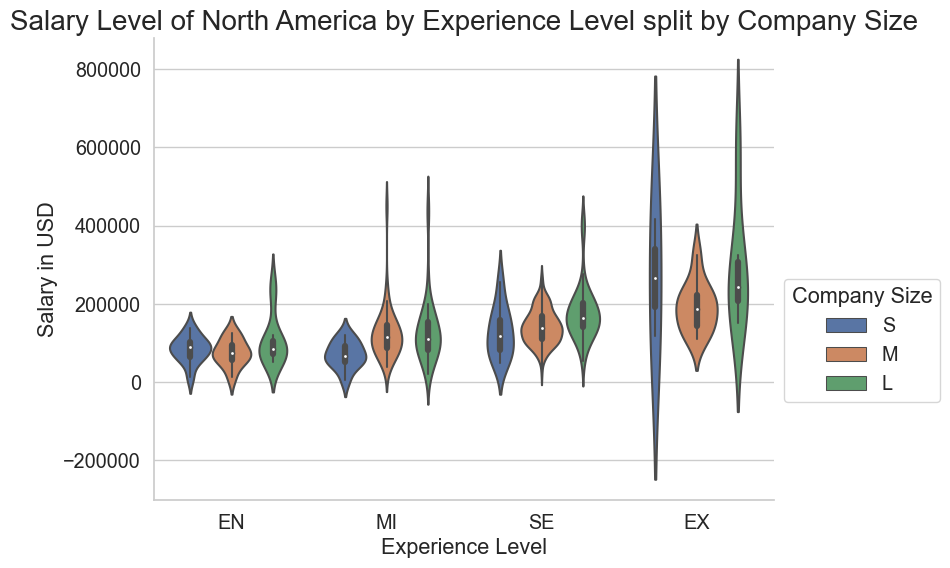

In [36]:
plt.figure(figsize=(8, 6))
axSalarySize = sns.violinplot(x = "experience_level",y = "salary_in_usd", data = dfNorAm, 
                              order = ("EN", "MI", "SE", "EX"),
                              hue = "company_size", hue_order = ("S", "M", "L"))
axSalarySize.set_title("Salary Level of North America by Experience Level split by Company Size", size = 20)
axSalarySize.set(xlabel = "Experience Level", ylabel = "Salary in USD")
axSalarySize.legend(title = "Company Size", bbox_to_anchor=(1, 0.5))
plt.show()

#### Summary of Findings

- The above violinplot shows that each as the experience level becomes more advanced, the salary level goes up as expected.
- For Entry, Middle and Senior level employees, the most common range of the salary level is in between 100,000 to 200,000. For those people, as the company size gets bigger, their salaries tend to increase. 
- For the Expert level employees, the range of salary level is large in any company size. It can be inferred that when they gain skills, they may start their own buisiness, which let them work in small company, but earn a lot.    
- It is important to note that the value in the salary range that is less than 0 is due to the calculation of the violinplot and does not mean that there are employees working with negative salaries.